In [33]:
import warnings; warnings.filterwarnings("ignore")

from id_signaling.figures import load_minority_dfs, covert_vs_minority_frac

In [4]:
minority_dfs = load_minority_dfs()

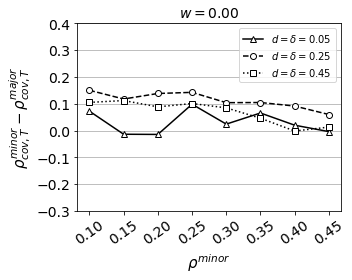

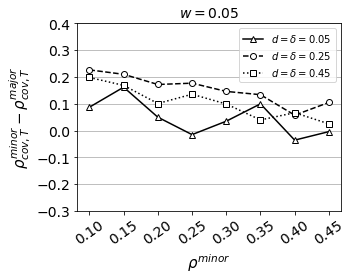

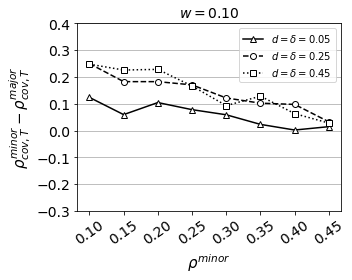

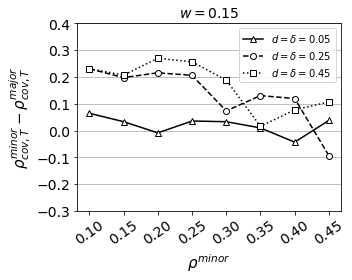

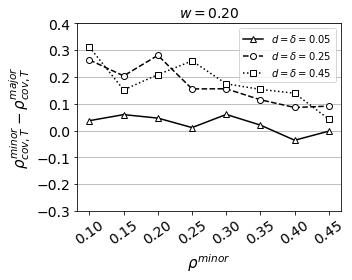

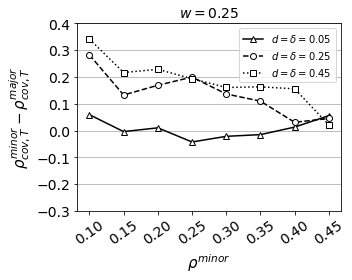

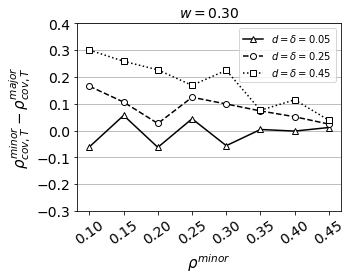

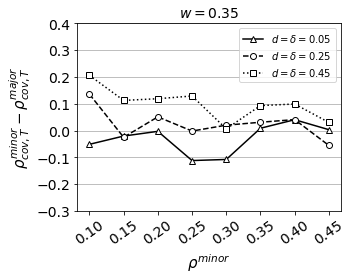

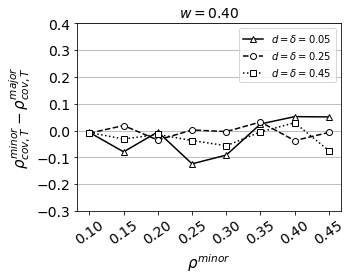

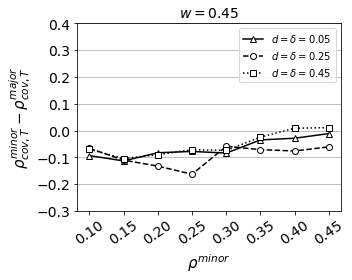

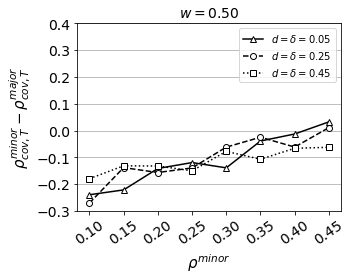

In [35]:
# covert_vs_minority_frac(minority_dfs, [0.1, 0.25, 0.45], 0.25)
# for homophily in np.arange(0, 0.51, 0.05):
# for homophily in np.arange(0, 0.51, 0.05)[1::2]:
for homophily in np.arange(0, 0.51, 0.05)[-2:]:
    print(homophily)
    covert_vs_minority_frac(minority_dfs, [0.05, 0.25, 0.45], homophily, 
                            savefig_path=f'reports/Figures/minority-homophily={homophily:.2f}'.replace('.', 'p') + '.pdf')

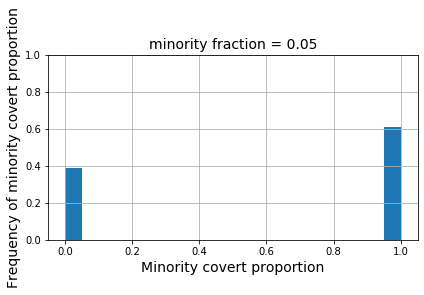

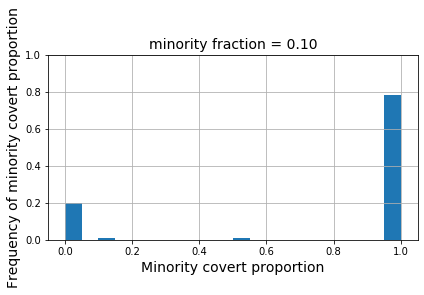

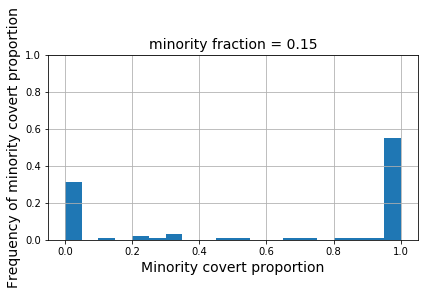

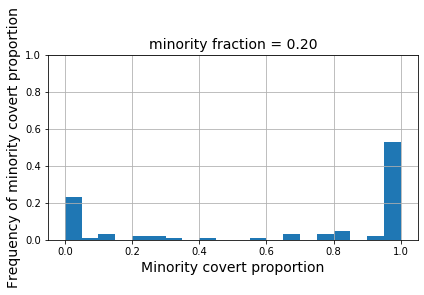

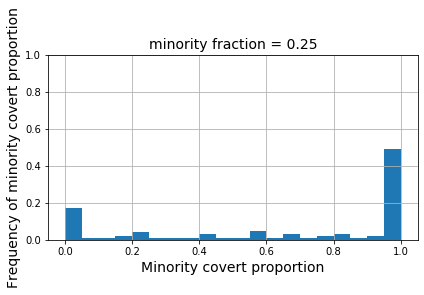

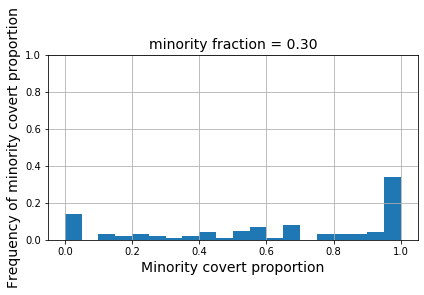

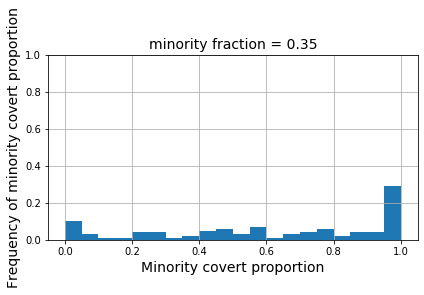

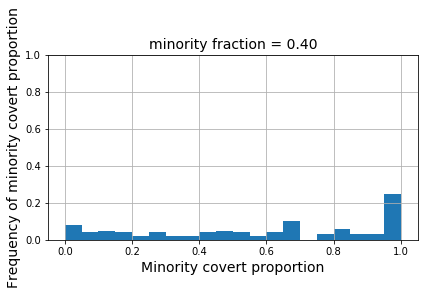

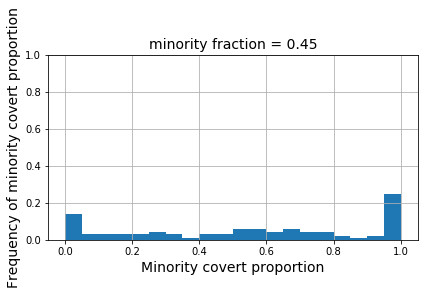

In [58]:
df = minority_dfs[5][1]
disliking = 0.25
homophily = 0.25

for label, df in minority_dfs:
#     print(label)
    plt.figure()
    pre = mean_final_cov_prop = df[
                (df.timestep == 500) &
                (df.disliking == disliking) &
                (df.homophily == homophily)
            ]
    pre.prop_covert_minority.hist(bins=20, weights=np.ones(100)/100)
    plt.ylim(0, 1)
    plt.title(f'minority fraction = ' + label, size=14)
    plt.ylabel('Frequency of minority covert proportion', size=14)
    plt.xlabel('Minority covert proportion', size=14)

In [34]:
df0 = minority_dfs[0][1]

df0.head()


minority_dfs[-1][1].head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,minority_trait_frac,prop_churlish,prop_churlish_majority,prop_churlish_minority,prop_covert,prop_covert_majority,prop_covert_minority,timestep,trial_idx
0,0.0,0.0,0.5,0.5,0.45,0.50,0.400000,0.622222,0.53,0.527273,0.533333,0,228655451
1,0.0,0.0,0.5,0.5,0.45,0.49,0.400000,0.600000,0.54,0.563636,0.511111,1,228655451
2,0.0,0.0,0.5,0.5,0.45,0.50,0.381818,0.644444,0.54,0.563636,0.511111,2,228655451
3,0.0,0.0,0.5,0.5,0.45,0.50,0.381818,0.644444,0.53,0.563636,0.488889,3,228655451
4,0.0,0.0,0.5,0.5,0.45,0.50,0.400000,0.622222,0.53,0.545455,0.511111,4,228655451
